# 1. Importing Libraries and Loading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('election2024.csv')


# 2. Understanding the Data Structure

In [3]:
# Display the first few rows
print(df.head())


                 id   sex   age federal_district  \
0  07169ed8148ce047  male  18.0  north caucasian   
1  0716a4f3354cecdd  male  23.0  north caucasian   
2  0716889b304ce79c  male  20.0            volga   
3  07168e28b5cce563  male  22.0     northwestern   
4  0716a563914ce549  male  21.0         southern   

                                   type_of_city    knows_election_date  \
0                                       village     named correct date   
1                                       village     named correct date   
2         city with population of less than 50k     named correct date   
3  city with population of 1 million and higher  not sure or no answer   
4  city with population of 1 million and higher     named correct date   

        will_vote candidate      television_usage      internet_usage  \
0        not sure     Putin  several times a week  over 4 hours a day   
1        not sure     Putin      once half a year  over 4 hours a day   
2  definitely yes     P

In [4]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [5]:
# Get summary statistics for numerical columns
print(df.describe())

               age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


In [6]:
# Get summary statistics for all columns (including categorical)
print(df.describe(include='all'))

                      id     sex          age federal_district  \
count               1600    1600  1600.000000             1600   
unique              1600       2          NaN                8   
top     071682392a8ce482  female          NaN          central   
freq                   1     843          NaN              425   
mean                 NaN     NaN    49.936250              NaN   
std                  NaN     NaN    16.901797              NaN   
min                  NaN     NaN    18.000000              NaN   
25%                  NaN     NaN    37.000000              NaN   
50%                  NaN     NaN    49.000000              NaN   
75%                  NaN     NaN    64.000000              NaN   
max                  NaN     NaN    90.000000              NaN   

                            type_of_city knows_election_date       will_vote  \
count                               1600                1600            1600   
unique                                 7       

# 3. Checking for Missing Values

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


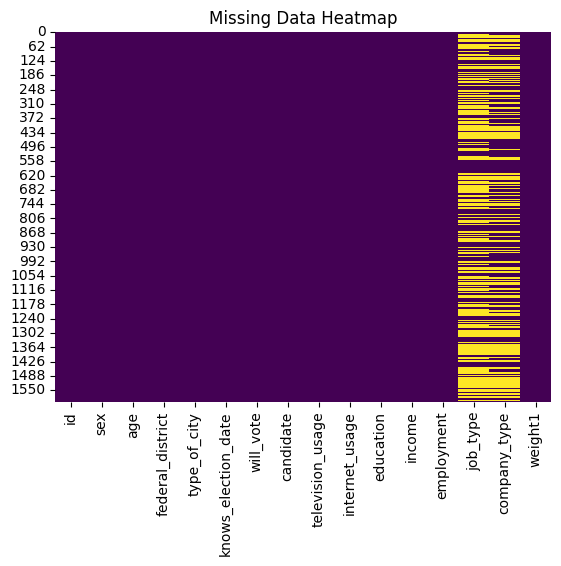

In [8]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 4. Analyzing Categorical Variables

In [10]:
# Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()


Column: id
id
071682392a8ce482    1
0716d3d9b1cce525    1
071682cba18ce4da    1
07167a8cc6cce261    1
0716c94b94cce059    1
                   ..
0716a563914ce549    1
07168e28b5cce563    1
0716889b304ce79c    1
0716a4f3354cecdd    1
07169ed8148ce047    1
Name: count, Length: 1600, dtype: int64

Column: sex
sex
female    843
male      757
Name: count, dtype: int64

Column: federal_district
federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64

Column: type_of_city
type_of_city
city with population of 100-500k                391
village                                         366
city with population of 1 million and higher    307
city with population of less than 50k           179
city with population of 500-950k                170
city with population of 50-100k                 106
settlement                       

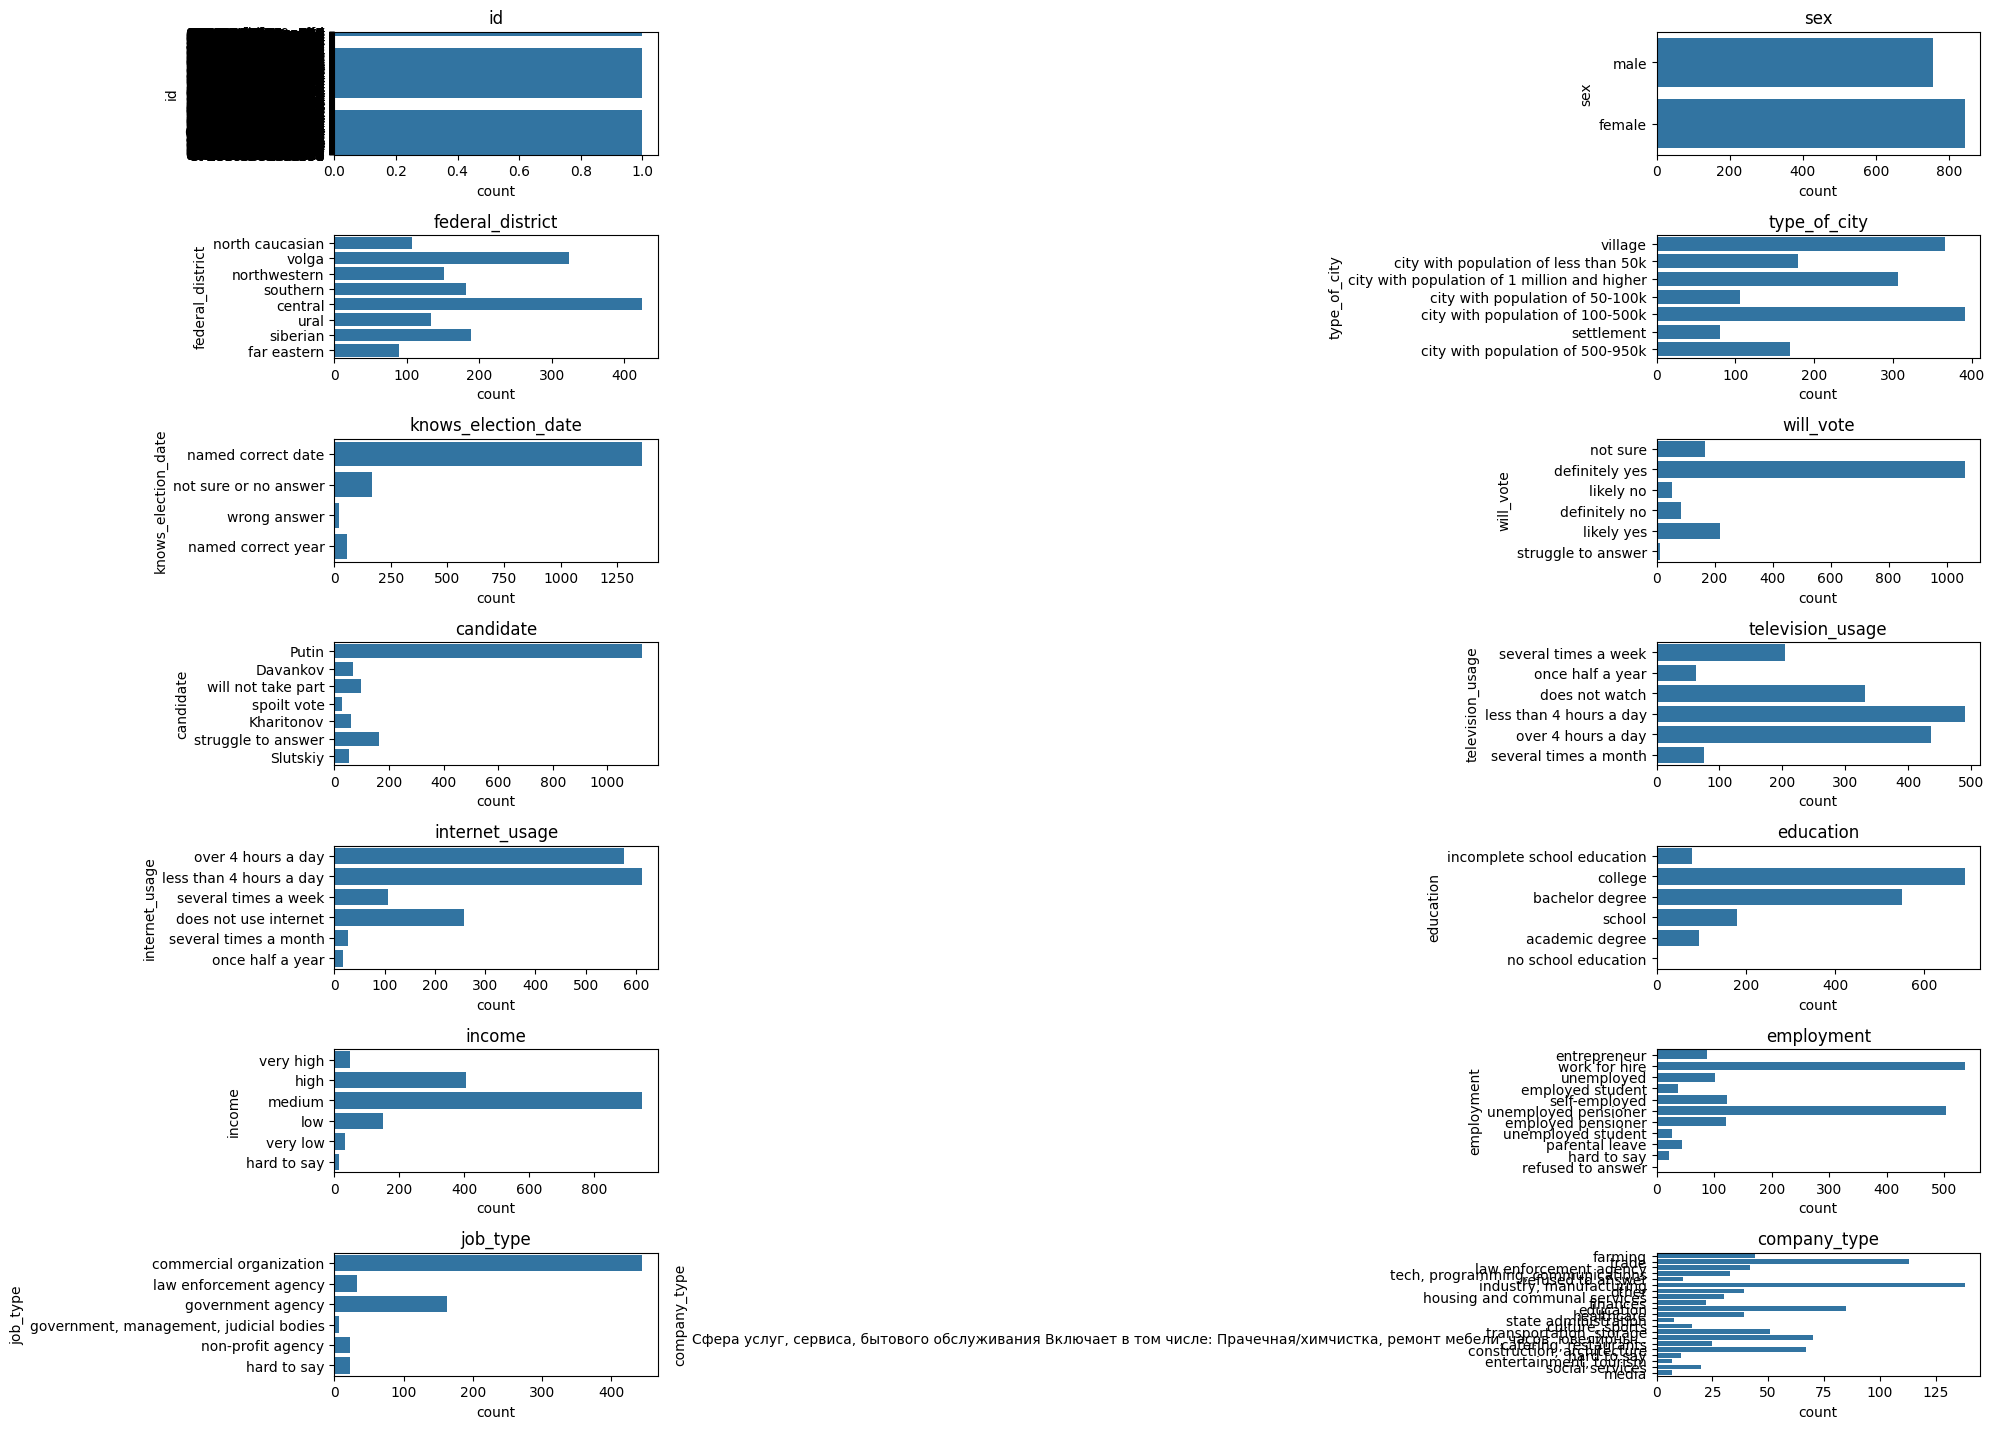

In [17]:
# Visualizing categorical variables
plt.figure(figsize=(20, 16))
for i, col in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i+1)
    sns.countplot(y=col, data=df)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

# Identifying the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Display the first few rows of the dataframe after label encoding
df_encoded_head = df.head()

print(df_encoded_head)

     id  sex   age  federal_district  type_of_city  knows_election_date  \
0  1042    1  18.0                 2             6                    0   
1  1141    1  23.0                 2             6                    0   
2   670    1  20.0                 7             4                    0   
3   761    1  22.0                 3             0                    2   
4  1146    1  21.0                 5             0                    0   

   will_vote  candidate  television_usage  internet_usage  education  income  \
0          4          2                 5               3          3       4   
1          4          2                 2               3          2       4   
2          1          2                 5               3          2       4   
3          4          0                 5               3          2       4   
4          1          2                 0               3          1       4   

   employment  job_type  company_type   weight1  
0           2     

# 5. Analyzing Numerical Variables

               age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


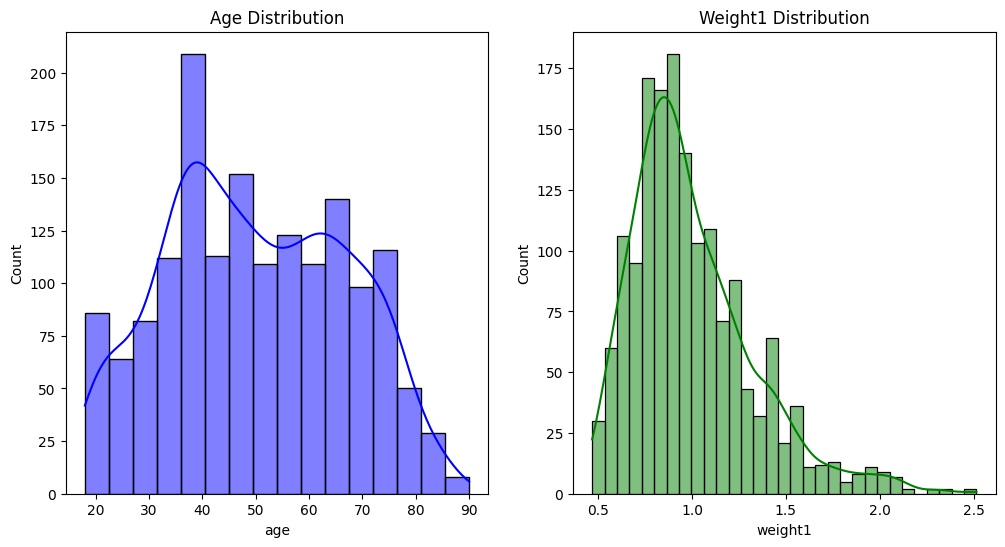

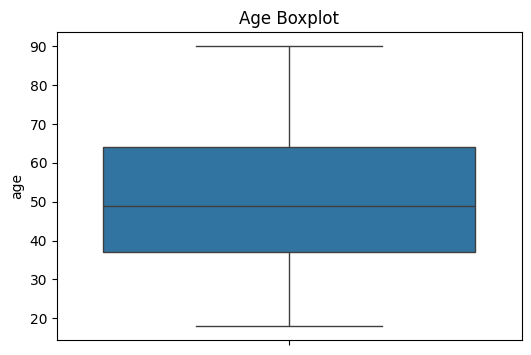

In [12]:
# Summary statistics of numerical columns
print(df[['age', 'weight1']].describe())

# Visualizing distributions
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')

# Weight1 distribution
plt.subplot(1, 2, 2)
sns.histplot(df['weight1'], kde=True, color='green')
plt.title('Weight1 Distribution')

plt.show()

# Boxplot for age
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['age'])
plt.title('Age Boxplot')
plt.show()


# 6. Handling Missing Data (Imputation or Dropping)

In [24]:
# Drop rows with missing values (if necessary)
df_dropped = df.dropna()

# Impute missing values for 'job_type' and 'company_type' with 'Unknown'
df_imputed = df.copy()
df_imputed['job_type'] = df_imputed['job_type'].fillna('Unknown')
df_imputed['company_type'] = df_imputed['company_type'].fillna('Unknown')

print(df_imputed.isnull().sum())  # Check that missing values are handled

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64


# 7. Correlation Analysis (if applicable)

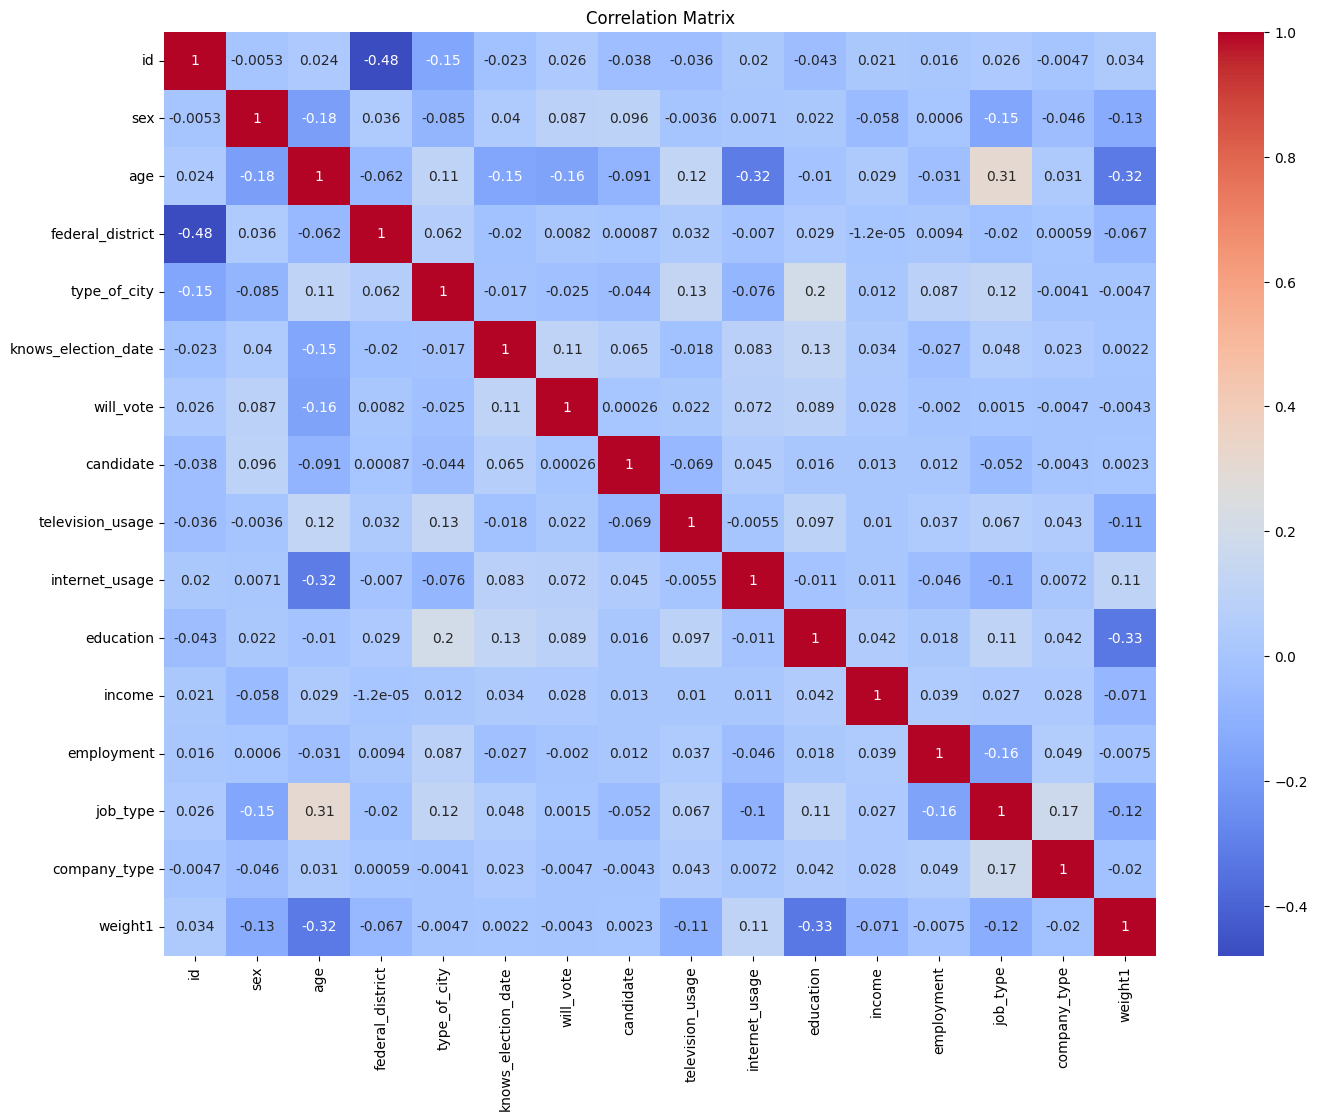

In [23]:
# Correlation matrix for numerical variables
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 8. Further Analysis and Visualization (e.g., Cross-Tabulation)

In [19]:
# Cross-tabulation of candidate preference by income level
candidate_by_income = pd.crosstab(df['candidate'], df['income'])
print(candidate_by_income)


income              hard to say  high  low  medium  very high  very low
candidate                                                              
Davankov                      0    17   10      33          3         4
Kharitonov                    0     7   13      37          2         4
Putin                        10   313   69     684         38        14
Slutskiy                      1    10   11      31          0         2
spoilt vote                   0     3   11      12          1         0
struggle to answer            2    41   23      94          0         4
will not take part            2    14   12      58          4         6


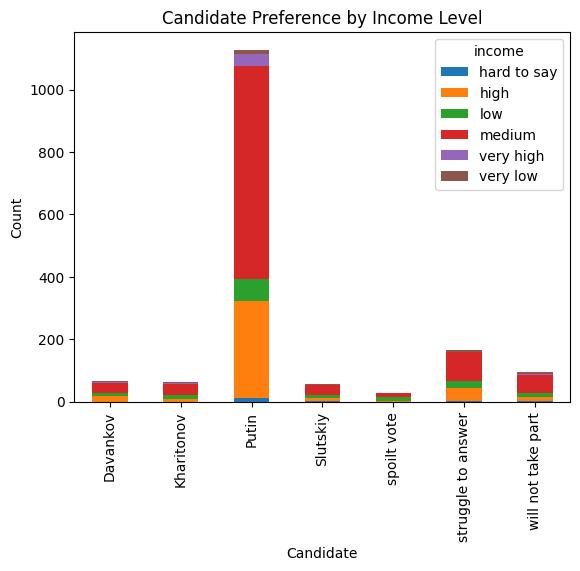

In [20]:
# Visualizing the cross-tabulation
candidate_by_income.plot(kind='bar', stacked=True)
plt.title('Candidate Preference by Income Level')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.show()